# Principal component analysis

[Remember that we can rotate a dataset into new coordinate space](004-rotate.ipynb). This is the core idea behind PCA, which rotates a high-dimensional dataset into a space where maximum amount of variance is captured in smallest amount of dimensions. Realistic datasets often have very high dimensionality but classical data mining methods can perform poorly in these conditions. This is known as "curse of dimensionality". Furthermore, high-dimenensional data is difficult for humans to visualize.

In [3]:
data <- iris
data <- data[,-5]

print(head(data))

  Sepal.Length Sepal.Width Petal.Length Petal.Width
1          5.1         3.5          1.4         0.2
2          4.9         3.0          1.4         0.2
3          4.7         3.2          1.3         0.2
4          4.6         3.1          1.5         0.2
5          5.0         3.6          1.4         0.2
6          5.4         3.9          1.7         0.4


We want to reduce this 4-dimensional data set into something more manageable. Classical method to achieve this is eigen decomposition, which requires us to firstly mean-center our data. Arithmetic mean for each dimension will be subtracted from the data which is a common step in data standardization.

In [4]:
means <- colMeans(data)
centered <- t( t(data) - means )

print(means)
print(head(centered))

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333 
     Sepal.Length Sepal.Width Petal.Length Petal.Width
[1,]   -0.7433333  0.44266667       -2.358  -0.9993333
[2,]   -0.9433333 -0.05733333       -2.358  -0.9993333
[3,]   -1.1433333  0.14266667       -2.458  -0.9993333
[4,]   -1.2433333  0.04266667       -2.258  -0.9993333
[5,]   -0.8433333  0.54266667       -2.358  -0.9993333
[6,]   -0.4433333  0.84266667       -2.058  -0.7993333


Resulting set has arithmetic mean of zero (minor floating-point strangeness may happen when testing this). Note that double-transpose was applied as subtracting vector from matrix in R is done row-wise, and we want to return to our original column oriented dataset (yes, each operation will copy the entire dataset in memory). 

Subsequently, we can calculate variance-covariance matrix of newly centered data

In [5]:
c <- cov(centered)
print(c)

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    0.6856935  -0.0424340    1.2743154   0.5162707
Sepal.Width    -0.0424340   0.1899794   -0.3296564  -0.1216394
Petal.Length    1.2743154  -0.3296564    3.1162779   1.2956094
Petal.Width     0.5162707  -0.1216394    1.2956094   0.5810063


> Covariance matrix is explained [here](002-var-covar.ipynb)

Then we will compute the eigenvalues and eigenvectors of our covariance matrix. Resulting eigenvectors are multiplied with centered dataset to rotate it to new vectors space.

          [,1]       [,2]        [,3]         [,4]
[1,] -2.684126 -0.3193972 -0.02791483  0.002262437
[2,] -2.714142  0.1770012 -0.21046427  0.099026550
[3,] -2.888991  0.1449494  0.01790026  0.019968390
[4,] -2.745343  0.3182990  0.03155937 -0.075575817
[5,] -2.728717 -0.3267545  0.09007924 -0.061258593
[6,] -2.280860 -0.7413304  0.16867766 -0.024200858


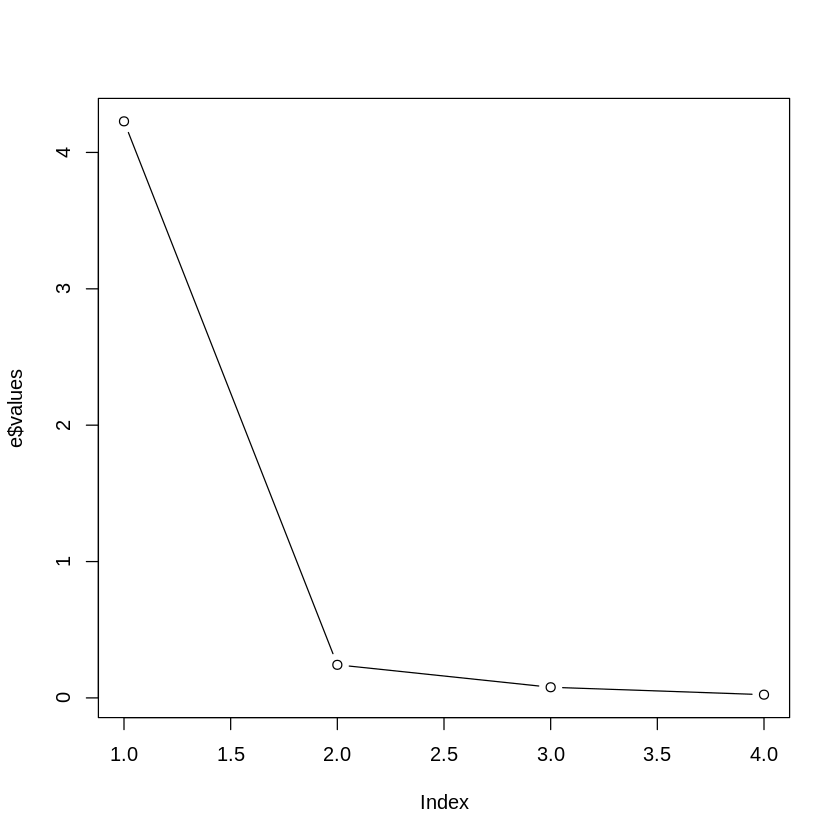

In [29]:
e <- eigen(c)

library(ggplot2)
#print(e$vectors)

featureVect <- e$vectors

rotated <- centered %*% featureVect

print(head(rotated))
plot(e$values, type = "b")

Eigenvectors represent the longest line through data dimension while corresponding eigenvalue denotes its length. Note the decreasing nature of eigenvalues - dimensions in the resulting data are already ordered according to significance. We can now create a reduced dataset where less significant values are ignored.

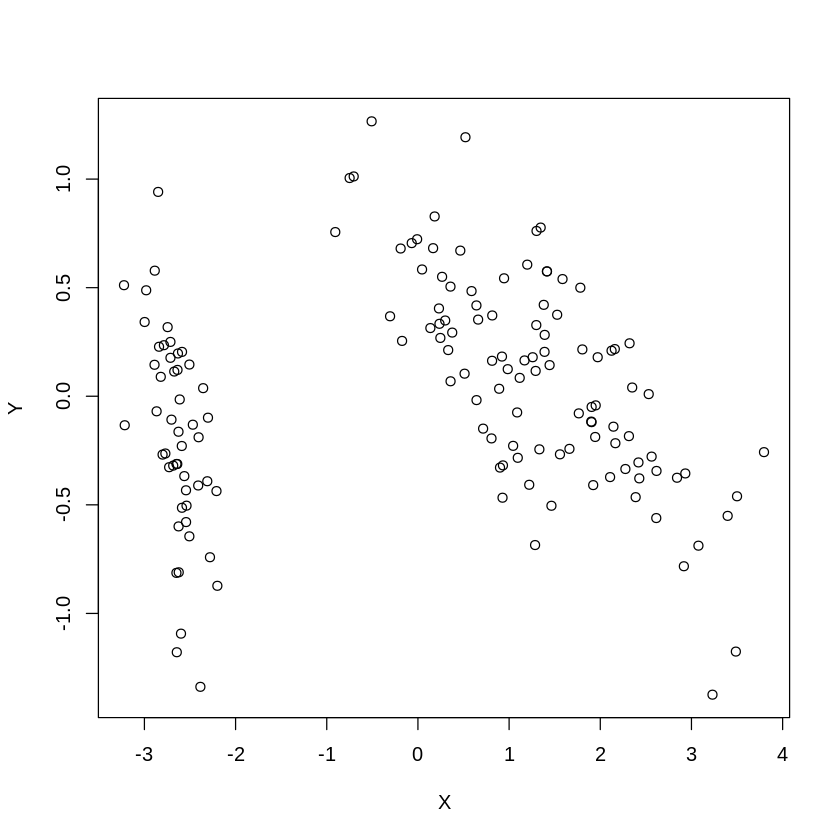

In [35]:
reduced <- rotated[,c(1,2)]
plot(reduced, xlab = "X", ylab = "Y")

Two distinct clusters emerge once we plot first two principal components on X and Y axis. Thus, we can use any clustering or classification methods on this compressed data. If the less important dimensions and subtracted means were not discarded, we can rotate the entire dataset back to original vector space.

In [42]:
orig <- t(rotated %*% t(e$vectors)) + means
orig <- t(orig)
colnames(orig) <- colnames(data)

print(head(orig))

     Sepal.Length Sepal.Width Petal.Length Petal.Width
[1,]          5.1         3.5          1.4         0.2
[2,]          4.9         3.0          1.4         0.2
[3,]          4.7         3.2          1.3         0.2
[4,]          4.6         3.1          1.5         0.2
[5,]          5.0         3.6          1.4         0.2
[6,]          5.4         3.9          1.7         0.4


Some transpose magic is needed to ensure proper element-wise multiplication and addition in R. A builtin `prcomp` function can be used to achieve the same result.

In [48]:
builtin <- data.frame()
builtin.pca <- prcomp(data)
builtin.rotated <- builtin.pca$x

In [49]:
builtin.back <- t(builtin.rotated %*% t(builtin.pca$rotation)) + builtin.pca$center
builtin.back <- t(builtin.back)

In [50]:
print(head(builtin.back))

     Sepal.Length Sepal.Width Petal.Length Petal.Width
[1,]          5.1         3.5          1.4         0.2
[2,]          4.9         3.0          1.4         0.2
[3,]          4.7         3.2          1.3         0.2
[4,]          4.6         3.1          1.5         0.2
[5,]          5.0         3.6          1.4         0.2
[6,]          5.4         3.9          1.7         0.4
